In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import shapiro


In [3]:
raw_data = pd.read_excel("../Paris housing Data Set 2 4050.xlsx")
housing_df = raw_data.copy(deep=True)
housing_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0


In [4]:
housing_df.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [5]:
# dtype_table = pd.DataFrame(housing_df.dtypes, columns=['Data Type'])
# dtype_table.index.name = 'Column Name'

# # Display the table
# dtype_table

In [6]:
housing_df.shape

(19999, 11)

In [7]:

dtype_table = pd.DataFrame(housing_df.isna().sum(), columns=['No of Missing Data (Nan)'])
dtype_table.index.name = 'Column Name'

# Display the table
dtype_table

,No of Missing Data (Nan)
Column Name,
price,4
bedrooms,15
bathrooms,11
sqft_living,1
sqft_total,5
floors,0
condition,1
grade,0
built,1


In [8]:
(housing_df.isna().sum()/len(housing_df))*100

Column Name
price               0.020001
bedrooms            0.075004
bathrooms           0.055003
sqft_living         0.005000
sqft_total          0.025001
floors              0.000000
condition           0.005000
grade               0.000000
built               0.005000
renovated           0.000000
living_area_sqft    0.030002
dtype: float64

In [9]:
nan_rows_count = housing_df.isna().all(axis=1).sum()
nan_rows_count

np.int64(0)

In [10]:
housing_df_without_nan = housing_df.dropna()
rows_with_nan_data = len(housing_df) - len(housing_df_without_nan)
print("Number of rows with NaN values is: ",rows_with_nan_data)
print("Percentage of rows with NaN values is: ",(rows_with_nan_data/len(housing_df))*100)

Number of rows with NaN values is:  37
Percentage of rows with NaN values is:  0.18500925046252312


In [11]:
# dataplot = sns.heatmap(housing_df_without_nan.corr(method="pearson"), cmap="YlGnBu", annot=True)

# # Displaying heatmap
# plt.show()

In [12]:
correlations = housing_df_without_nan.corr()['price'].drop('price')  # Drop self-correlation

# Find the most correlated column
most_correlated_column = correlations.idxmax()
highest_correlation_value = correlations.max()


In [13]:
most_correlated_column, highest_correlation_value

('sqft_living', np.float64(0.7010909427105703))

In [14]:
correlations = housing_df_without_nan.corr()['price'].drop('price')  # Drop self-correlation

# Find the most correlated column
least_correlated_column = correlations.idxmin()
least_correlation_value = correlations.min()
least_correlated_column, least_correlation_value

('built', np.float64(0.04020182928088542))

In [15]:
no_of_nan_rows_bed_and_bath = housing_df[['bedrooms', 'bathrooms']].isna().all(axis=1).sum()
no_of_nan_rows_bed_and_bath

np.int64(7)

In [16]:
housing_df.isna().sum()

Column Name
price                4
bedrooms            15
bathrooms           11
sqft_living          1
sqft_total           5
floors               0
condition            1
grade                0
built                1
renovated            0
living_area_sqft     6
dtype: int64

In [17]:
# fill nan for bathrooms, bedrooms, and other values except price
housing_df[['bedrooms','sqft_total','living_area_sqft']] = housing_df[['bedrooms','sqft_total','living_area_sqft']].bfill()
housing_df['bathrooms'] = housing_df['bathrooms'].ffill()
housing_df[['sqft_living', 'condition','built']] = housing_df[['sqft_living', 'condition','built']].apply(lambda col: col.fillna(col.median()))
housing_df.isna().sum()

Column Name
price               4
bedrooms            0
bathrooms           0
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64

### REPLACING NAN VALUES FOR PRICE COLUMN USING COSINE SIMILARITY

In [18]:
data_without_price = housing_df[housing_df.price.isna()]
data_without_price.reset_index(inplace=True)
dict_from_df_index = dict(zip( data_without_price.index, data_without_price["index"]))
data_without_price.drop(columns=['index'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15280\2234587514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_price.drop(columns=['index'], inplace=True)


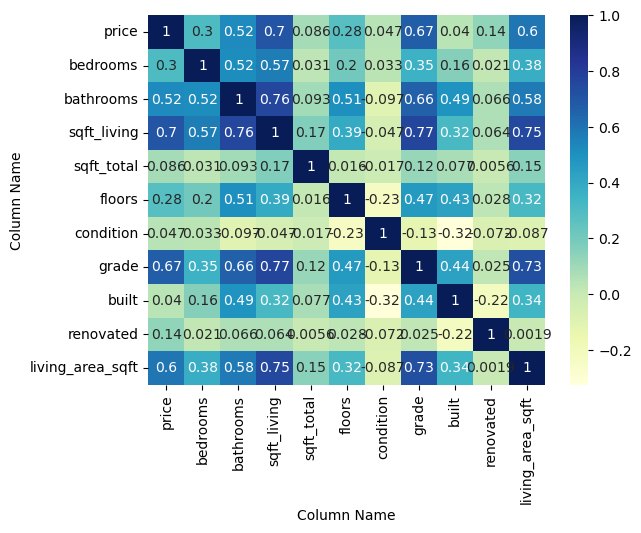

In [19]:
dataplot = sns.heatmap(housing_df_without_nan.corr(method="pearson"), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [20]:
column_list = ['price','grade','bathrooms','sqft_living','living_area_sqft']
data_without_price = data_without_price[column_list]
data_without_price

Column Name,price,grade,bathrooms,sqft_living,living_area_sqft
0,NaN,9,2.25,2240.0,2440.0
1,NaN,7,1.50,1140.0,1200.0
2,NaN,10,2.75,3330.0,2390.0
3,NaN,10,2.50,2880.0,2640.0


In [21]:
## FILTER DF TO GET ONLY ROWS WITH VALUES IN SAME RANGE AS THOSE WITH ROWS HAVING MISSING PRICE
housing_df_without_nan = housing_df_without_nan[column_list]
filtered_df = housing_df_without_nan[
    (housing_df_without_nan["grade"].between(7, 10)) & 
    (housing_df_without_nan["bathrooms"].between(1, 3)) & 
    (housing_df_without_nan["sqft_living"].between(1100, 3340)) & 
    (housing_df_without_nan["living_area_sqft"].between(1190, 26650))
].reset_index(drop=True)  # Reset index
 
filtered_df

Column Name,price,grade,bathrooms,sqft_living,living_area_sqft
0,221900.0,7,1.00,1180.0,1340.0
1,604000.0,7,3.00,1960.0,1360.0
2,510000.0,8,2.00,1680.0,1800.0
3,257500.0,7,2.25,1715.0,2238.0
4,229500.0,7,1.00,1780.0,1780.0
...,...,...,...,...,...
14014,439108.0,8,1.50,1130.0,1310.0
14015,260000.0,7,2.25,1489.0,1584.0
14016,279000.0,7,2.50,2690.0,2090.0
14017,380000.0,7,2.25,1530.0,1320.0


In [22]:
row_data = data_without_price.iloc[0].tolist()
row_data
index_list = data_without_price.index.tolist()
for val in index_list:
    orig_data_index = dict_from_df_index[val]
    target_df = filtered_df
    sqft_living_value = data_without_price['sqft_living'].iloc[val].item()

    # Target row
    row_data = data_without_price.iloc[val].tolist()
    target_row = np.array([row_data[1:]])  # Skip the price

    # Compute cosine similarity
    if 'similarity' in target_df.columns:
        target_df = target_df.drop(columns=['similarity'])
    similarities = cosine_similarity(target_df.iloc[:,1:].values, target_row) # also exclude price here

    # Add similarity scores to the DataFrame
    target_df['similarity'] = similarities.round(2)

    # Sort by highest similarity
    df_sorted = target_df.sort_values(by='similarity', ascending=False)

    # most correlated value with price is sqft_living and we want to get the house closest to our target in terms of sqft_living
    df_sorted["rank"] = (df_sorted["sqft_living"] - sqft_living_value).abs().rank(method="min")
    new_df = df_sorted.sort_values(by="rank")
    #print(new_df.head(2))

    # set price value on the data_without_price_df. always pick the row with rank =1, index =0
    # set price value on the original df(data). always pick the row with rank =1, index =0
    data_without_price.at[val, "price"] = new_df['price'].iloc[0].item()
    housing_df.at[orig_data_index, "price"] = new_df['price'].iloc[0].item()

    #del df_sorted, target_df
print(housing_df.isna().sum())   
data_without_price



Column Name
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64


Column Name,price,grade,bathrooms,sqft_living,living_area_sqft
0,410000.0,9,2.25,2240.0,2440.0
1,345000.0,7,1.50,1140.0,1200.0
2,1824100.0,10,2.75,3330.0,2390.0
3,1989000.0,10,2.50,2880.0,2640.0


In [23]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Column Name,,,,,,,,
price,19999.0,535515.736237,366146.371524,75000.0,317000.0,449900.0,640000.0,7700000.0
bedrooms,19999.0,3.366468,0.930131,1.0,3.0,3.0,4.0,33.0
bathrooms,19999.0,2.072941,0.761132,0.5,1.5,2.0,2.5,8.0
sqft_living,19999.0,2057.928396,905.618866,290.0,1420.0,1900.0,2510.0,13540.0
sqft_total,19999.0,15606.344317,41770.610377,520.0,5350.0,7819.0,11007.5,1651359.0
floors,19999.0,1.444872,0.516672,1.0,1.0,1.0,2.0,3.5
condition,19999.0,3.441772,0.665463,1.0,3.0,3.0,4.0,5.0
grade,19999.0,7.605730,1.172624,1.0,7.0,7.0,8.0,13.0
built,19999.0,1967.953198,28.316696,1900.0,1950.0,1969.0,1991.0,2015.0


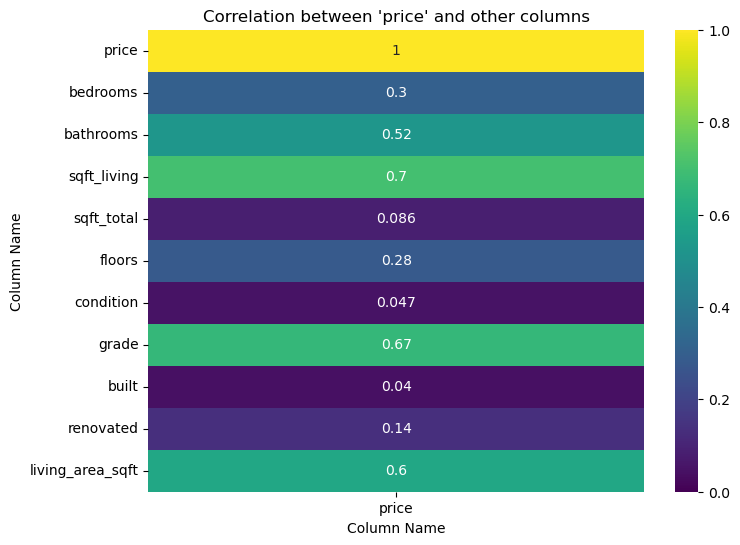

In [24]:
corr_matrix = housing_df.corr()
#You can choose a different colormap, such as 'viridis', 'plasma', etc.

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['price']], annot=True, cmap='viridis', vmin=0, vmax=1)
plt.title("Correlation between 'price' and other columns")
plt.show()

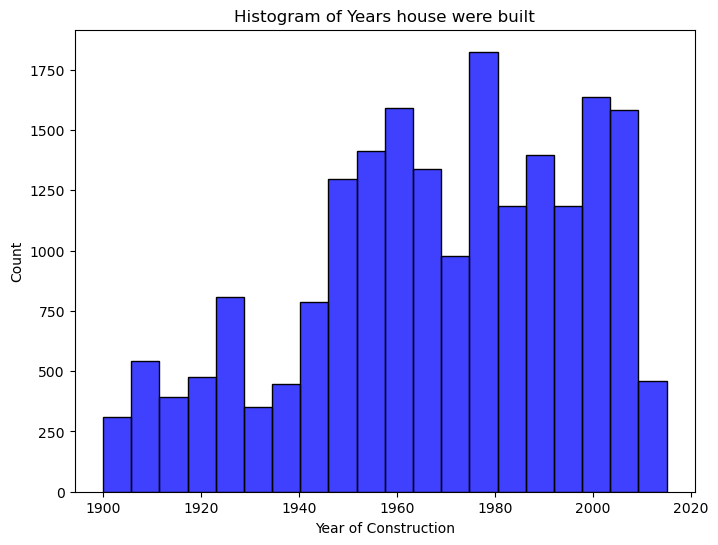

In [25]:
# Plot histogram for 'price'
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['built'],kde=False, color='blue', bins=20,edgecolor='black')

# Show count per bin
plt.title('Histogram of Years house were built')
plt.xlabel('Year of Construction')
plt.ylabel('Count')

# Display plot/
plt.show()

In [26]:
for column in housing_df.columns:
    stat, p = shapiro(housing_df[column])
    print(f"{column}: p-value = {p}")
# If p < 0.05, the data is not normally distributed.

price: p-value = 5.254257360154457e-102
bedrooms: p-value = 6.102651774892385e-87
bathrooms: p-value = 1.938214000357259e-68
sqft_living: p-value = 7.956370246294424e-74
sqft_total: p-value = 4.597981789140974e-128
floors: p-value = 6.321380223941106e-100
condition: p-value = 3.832242453426089e-101
grade: p-value = 4.721741237787348e-79
built: p-value = 3.320760473513796e-57
renovated: p-value = 5.557467930736678e-129
living_area_sqft: p-value = 1.4700789349367244e-68


c:\Users\HP\anaconda3\envs\msc_ds\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19999.
  res = hypotest_fun_out(*samples, **kwds)


Text(0.5, 1.0, 'Scatter Plot of Price vs. Living Area')

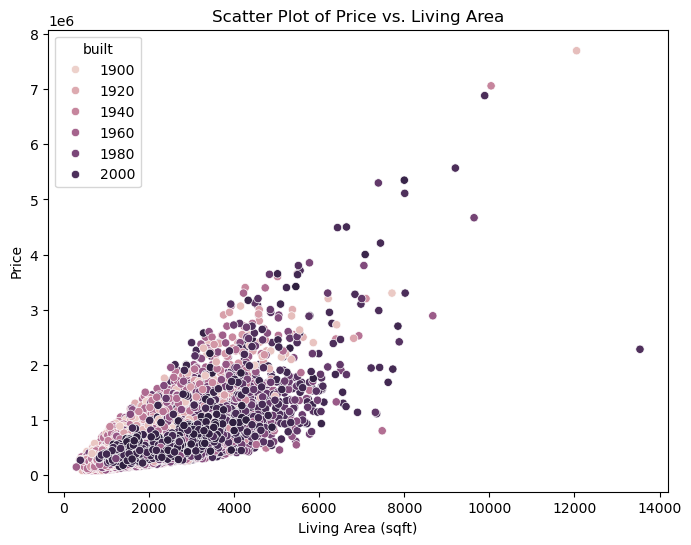

In [27]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data = housing_df, x=housing_df["sqft_living"], y=housing_df["price"], hue="built")
#plt.xlim(150, 1000 + housing_df['sqft_living'].max())
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

# Labels and title
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs. Living Area")
#plt.show()

In [28]:
print("Mode for built column is: ",housing_df['built'].mode())
housing_df.built.min()
housing_df.built.max()

#CHECK YEAR WITH LEAST HOUSES BUILT
yr_least_houses_built = housing_df.built.value_counts()
least_frequent = yr_least_houses_built[yr_least_houses_built == yr_least_houses_built.min()].index.tolist()
print("Least houses built:", least_frequent)
print("year with most houses built: ",len(housing_df[housing_df['built'] == 1977]))
print("year with least houses built: ", len(housing_df[housing_df['built'] == 2015]))

Mode for built column is:  0    1977.0
Name: built, dtype: float64
Least houses built: [2015.0]
year with most houses built:  416
year with least houses built:  17


### EXPLORING CORRELATIONS BETWEEN VARIOUS COLUMNS

In [29]:
## FROM CHATGPT, March 05,2025, 6:01 PM
corr_matrix = housing_df.corr(method='pearson') 
corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
# remove corellation between a column and itself
most_correlated_pairs = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]
most_correlated_pairs


Column Name       Column Name
sqft_living       grade          0.766482
grade             sqft_living    0.766482
sqft_living       bathrooms      0.761030
bathrooms         sqft_living    0.761030
living_area_sqft  sqft_living    0.753146
                                   ...   
built             renovated     -0.219861
floors            condition     -0.227673
condition         floors        -0.227673
                  built         -0.323959
built             condition     -0.323959
Length: 110, dtype: float64

In [30]:
# corr = housing_df.corr()

# plt.figure(figsize=(6, 5))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")

# plt.show()


Text(0.5, 1.0, 'Scatter Plot of Price vs. Number of Bedrooms')

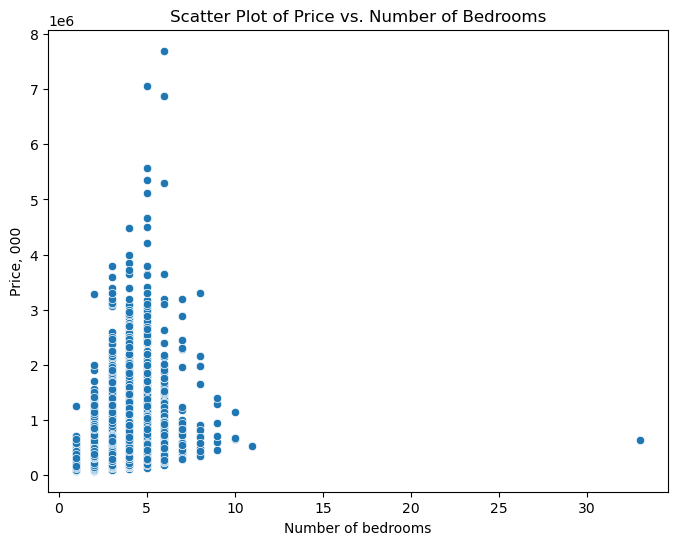

In [31]:
# Scatter plot
plt.figure(figsize=(8, 6))
#sns.scatterplot(data = housing_df, x=housing_df["bedrooms"], y=housing_df["price"], hue="built")
sns.scatterplot(data = housing_df, x=housing_df["bedrooms"], y=housing_df["price"])

# Labels and title
plt.xlabel("Number of bedrooms")
plt.ylabel("Price, 000")
plt.title("Scatter Plot of Price vs. Number of Bedrooms")
#plt.show()

In [32]:
filtered_housing_df = housing_df[housing_df['bedrooms'] <= 6]

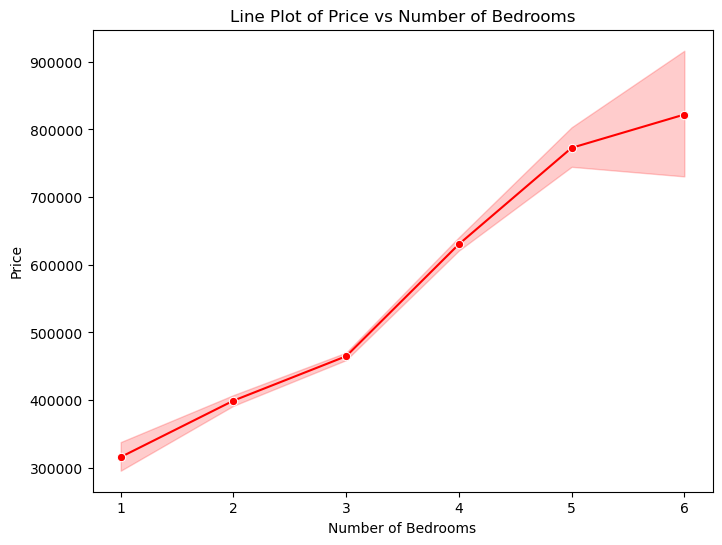

In [33]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=filtered_housing_df['bedrooms'], y=filtered_housing_df['price'], marker='o', color='red')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Line Plot of Price vs Number of Bedrooms')

plt.show()


Text(0.5, 1.0, 'Scatter Plot of Price vs. Number of Bedrooms')

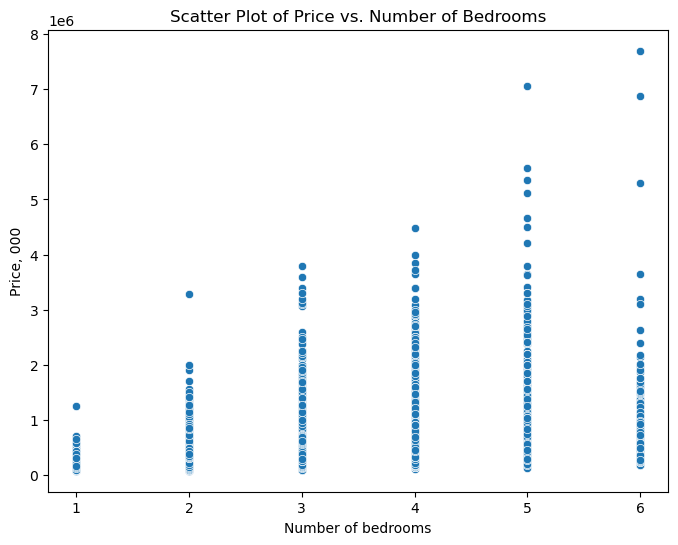

In [34]:
# Scatter plot
plt.figure(figsize=(8, 6))
#sns.scatterplot(data = housing_df, x=housing_df["bedrooms"], y=housing_df["price"], hue="built")
sns.scatterplot(data = filtered_housing_df, x=filtered_housing_df["bedrooms"], y=filtered_housing_df["price"])

# Labels and title
plt.xlabel("Number of bedrooms")
plt.ylabel("Price, 000")
plt.title("Scatter Plot of Price vs. Number of Bedrooms")
#plt.show()

## check for correlation between number of floors and total square foot

In [35]:
housing_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors',
       'condition', 'grade', 'built', 'renovated', 'living_area_sqft'],
      dtype='object', name='Column Name')

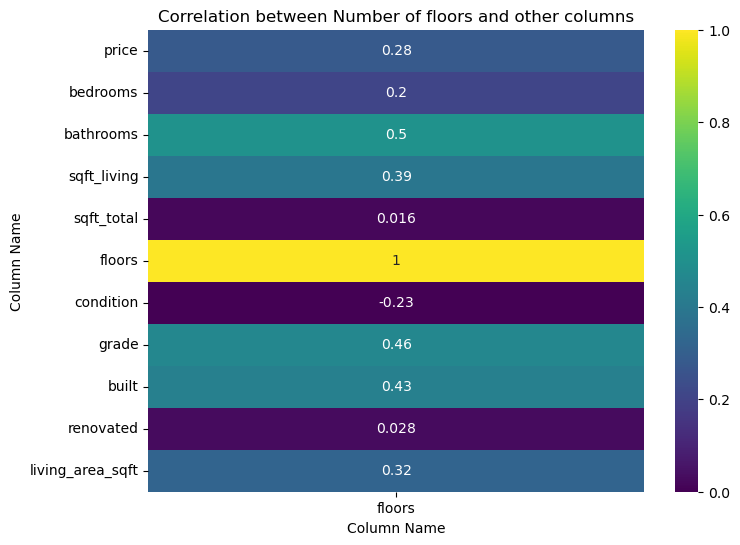

In [36]:
corr2_matrix = housing_df.corr()
#You can choose a different colormap, such as 'viridis', 'plasma', etc.

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['floors']], annot=True, cmap='viridis', vmin=0, vmax=1)
plt.title("Correlation between Number of floors and other columns")
plt.show()

Intercept: 134662.63977441133
Slope: 119072.2911824785


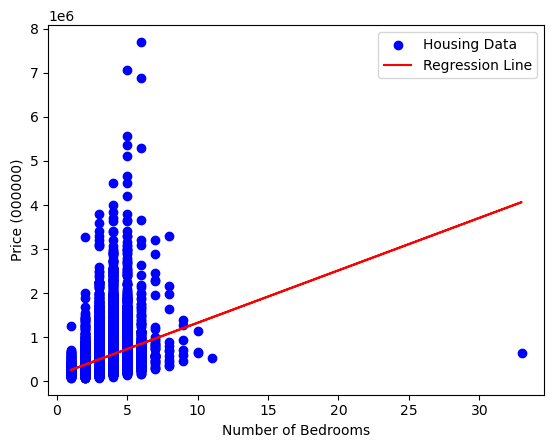

In [ ]:
from sklearn.linear_model import LinearRegression
X = housing_df[['bedrooms']]  # Independent variable (must be 2D for sklearn)
Y = housing_df['price']   # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get predictions
Y_pred = model.predict(X)

# Print regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Plot the regression line
plt.scatter(X, Y, color='blue', label="Housing Data")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (000000)")
plt.legend()
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Load dataset (assuming a CSV file)
# df = pd.read_csv("your_data.csv")

# # Define independent (X) and dependent (Y) variables
# X = df[['living_area_sqft', 'grade', 'sqft_living', 'bathrooms', 'bedrooms']]  # Features
# Y = df['price']  # Target variable

# # Split data into training and testing sets (80% train, 20% test)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Create and fit the model
# model = LinearRegression()
# model.fit(X_train, Y_train)

# # Get predictions
# Y_pred = model.predict(X_test)

# # Print model coefficients
# print(f"Intercept: {model.intercept_}")
# print("Coefficients:", dict(zip(X.columns, model.coef_)))

# # Calculate performance metrics
# mse = mean_squared_error(Y_test, Y_pred)
# r2 = r2_score(Y_test, Y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

# plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
# plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='dashed')  # Perfect line
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual vs Predicted Prices")
# plt.show()

